## Hashing
* __hash table__: a collection of items that are stored so that it is easy to find them later on
    - lookup is O(1)
    - __slot__: each position in a hash table
    - __hash function__: maps item to a slot where it belongs
        - is an equation that takes in an item and returns a slot value for it
        - for example: you want to insert an integer 54 into the hash table. you then use a hash function: h(item) = item % 11 to return 10
        - 10 is now the hash value or the slot
    - __load factor ( $\lambda$ )__: number of items / tableSize
        - for example: if table size = 11, and 6 slots are filled up, load factor = 6 / 11

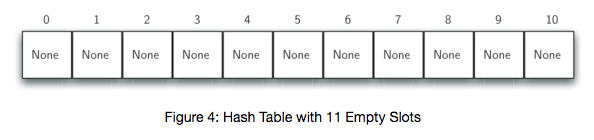

## Hash Functions
* goal: create a hash function that:
    - minimizes # of collisions (2+ items having the same slot)
    - easy to compute
    - evenly distributes items in the hash table

### Folding Method:
1. divide item in equal-size pieces
2. pieces are then added together
    - optional step: reverse every other piece before adding
3. then we do value % tableSize to get the hash value
***
* for example: phone #: 436-555-4601 and we split the digits up into groups of 2
* so it is now: 43 + 65 + 55 + 46 + 01 = 210
* then 210 % 11 = 1
* if we reversed: it would be 43 + 56 + 55 + 64 + 01 = 219
    - 219 % 11 = 10

### Mid-Square Method
1. square the item
2. get a part of the number
3. then do value % tableSize
***
* for example: the item is 44 so $44^{2}$ = 1936
* then you take the middle two digits so you would get 93
* then 93 % 11 = 5

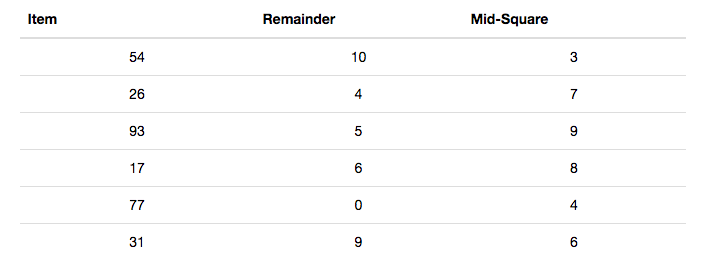

### From Strings
1. for strings, you can turn each character as its ASCII/Unicode equivalent
2. then add up all the values
3. value % tableSize = hash value
***
* for example: 'cat' = 99 + 97 + 116 = 312
* 312 % 11 = 4
***
* when using this hash function however, __anagrams__ will be given the same hash value
* you can solve this issue by giving weight to the positions of the letters
* example: 
    - 'cat' = (99 x 1) + (97 x 2) + (116 x 3)
    - 'act' = (97 x 1) + (99 x 2) + (116 x 3)

In [4]:
function hashString(aString, tableSize) {
    let hash = 0;
    for(let i = 0; i < aString.length; i++) {
        hash += aString.charCodeAt(i);
    }
    return hash % tableSize;
}

hashString('cat', 11);

4

In [6]:
function hashStringPos(aString, tableSize) {
    let hash = 0;
    for(let i = 0; i < aString.length; i++) {
        hash += aString.charCodeAt(i) * (i + 1);
    }
    return hash % tableSize;
}

hashStringPos('cat', 11);

3

## Collision Resolution
* __collision resolution__: process of finding another slot for an item if it hashes to an already occupied slot

### Open Addressing:
* collision resolution method that finds an empty slot in a sequential manner and places the item in the first empty slot it finds
* __linear probing__: an open addressing technique that finds an empty slot by moving one slot at a time
    - disadvantage: there is a tendency for __clustering__ when using linear probing
    - if there are many collisions at a certain position, then all of those values will be clustered around it
    - thus, this would affect all other items that need to be in those slots that are occupied b/c of the technique
* a way to deal with clustering is to have larger skips
    - instead of +1 slot, we can now do +3 slots so if there is a collision at slot 0, then we check at slot 3 rather than slot 1
* __rehashing__: name of process of looking for another slot after a collision
    - for linear probing, the function is newHashValue = rehash(oldHashValue)
    - +1 linear probing: rehash(pos) = (pos + 1) % tableSize
    - +3 linear probing: rehash(pos) = (pos + 3) % tableSize
    - the size of the skip should ensure that __all slots__ are eventually visited so the best way to do that is to have the table size be a __prime number__
* __quadratic probing__: increments the hash value by a squared number
    - so for example, we do h + 1, h + 4, h + 9, h + 16
    - so rehash(pos) = (h + i$^{2}$)

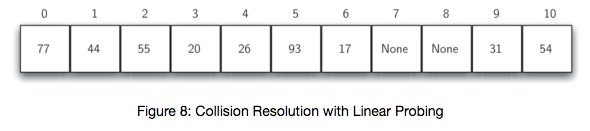

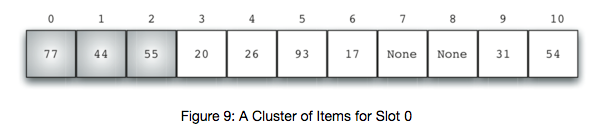

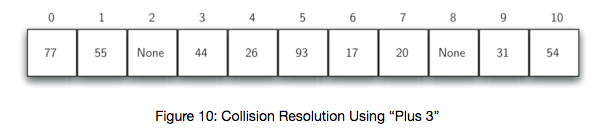

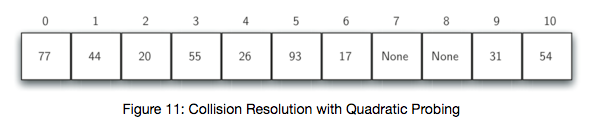

### Chaining
* collision resolution method that allows each slot to hold a reference to a collection of items
    - usually a linked list
* allows many items to occupy the same slot
* we can use a hash function to get the slot of the item we want to look for then search through the chain for the item at the slot
* if there are many items and many collisions at one spot, it can become harder to look for the item
* on avg though, there aren't going to be many items in each slot

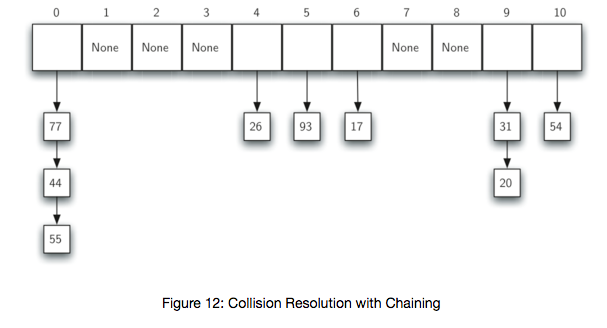

## Implementing the Map Abstract Data Type
* data type that stores key-value pairs (unordered)
* Operations:
    - Map(): creates a new, empty map.
    - put(key, val): adds a new key-value pair to the map. if it is already in the map, then replace the old value with the new value
    - get(key): given a key, return the value stored in the map or null if not
    - del: delete the key-value pair from the map
    - len: returns the number of items in the map

In [34]:
// simple hash table with a modulo based hash function
// and a linear probing collision method with a 'plus 1' rehash function

class HashTable {
    constructor() {
        this.size = 11;
        this.slots = [];
        this.data = [];
    }
    
    put(key, data) {
        let hashvalue = this.hashfunction(key);
        
        // if the slot is empty
        if(this.slots[hashvalue] == null) {
            this.slots[hashvalue] = key;
            this.data[hashvalue] = data;
        }
        // if the slot is already occupied
        // rehash or replace the data if same key
        else {
            // replaces old value
            if(this.slots[hashvalue] === key) {
                this.data[hashvalue] = data;
            }
            else {
                let nextslot = this.rehash(hashvalue);
                
                // keep rehashing until you find an empty slot
                // or you reached back to the original slot
                while(this.slots[nextslot] != null && this.slots[nextslot] !== key) {
                    nextslot = this.rehash(nextslot);
                }
                
                // if this slot is empty, fill it
                if(this.slots[nextslot] == null) {
                    this.slots[nextslot] = key;
                    this.data[nextslot] = data;
                }
                // if not empty, replace the old value with new one
                else {
                    // replaces
                    this.data[nextslot] = data;
                }
                
            }
        }
    }
    
    hashfunction(key) {
        return key % this.size;
    }
    
    rehash(oldhash) {
        return (oldhash + 1) % this.size;
    }
    
    get(key) {
        let startslot = this.hashfunction(key);
        let data = null;
        let stop = false; // have not found the item
        let found = false; // found the item
        let position = startslot;
        
        while(this.slots[position] != null && !found && !stop) {
            if(this.slots[position] === key) {
                found = true;
                data = this.data[position];
            }
            else {
                position = this.rehash(position);
                if(position === startslot) {
                    stop = true;
                }
            }
        }
        return data;
    }
}

var h = new HashTable();
h.put(54, 'cat');
h.put(26, 'dog');
h.put(93, 'lion');
h.put(17, 'tiger');
h.put(77, 'bird');
h.put(31, 'cow');
h.put(44, 'goat');
h.put(55, 'pig');
h.put(20, 'chicken');
console.log(h.slots);
console.log(h.data);

console.log(h.get(20));
console.log(h.get(17));
h.put(20, 'duck');
console.log(h.data);
console.log(h.get(99));

[ 77, 44, 55, 20, 26, 93, 17, <2 empty items>, 31, 54 ]
[
  'bird',
  'goat',
  'pig',
  'chicken',
  'dog',
  'lion',
  'tiger',
  <2 empty items>,
  'cow',
  'cat'
]
chicken
tiger
[
  'bird',  'goat',
  'pig',   'duck',
  'dog',   'lion',
  'tiger', <2 empty items>,
  'cow',   'cat'
]
null


## Analysis of Hashing
* best case: hashing is O(1) for search
* with collisions, it is entirely dependent on the load factor, $\lambda$, (num in table / table size)
    - if load factor is small, lower chance of collisions
    - if load factor is high, higher chance of collisions, and requires more collision resolution
* number of comparisons when searching
    - successful search with open addressing and linear probing technique: $\frac{1}{2} (1 + \frac{1}{1 - \lambda})$
    - unsuccessful search: $\frac{1}{2} (1 + (\frac{1}{1 - \lambda})^{2})$
    - avg number of comparisons = 1 + $\frac{\lambda}{2}$